In [135]:
library("ggplot2")
library("reshape2")

data <- read.csv("C:/Users/TushaCr7/Desktop/Lab1-EDA/Plot1.csv",header =T)

head(data)

Week,Total.A,Total.B,Percent.Positive.A,Percent.Positive.B,Total...Tested,X..Positive
201840,218,69,1.32,0.41,16492,1.74
201841,222,81,1.23,0.45,17980,1.68
201842,311,89,1.54,0.44,20128,1.98
201843,337,98,1.58,0.46,21302,2.04
201844,389,98,1.74,0.43,22281,2.18
201845,543,95,2.33,0.40,23304,2.73


In [136]:
melt_data <- melt(data,id=c("Week"))

head(melt_data)

Week,variable,value
201840,Total.A,218
201841,Total.A,222
201842,Total.A,311
201843,Total.A,337
201844,Total.A,389
201845,Total.A,543


In [137]:
options(repr.plot.width=15, repr.plot.height=10) # Plot dimensions

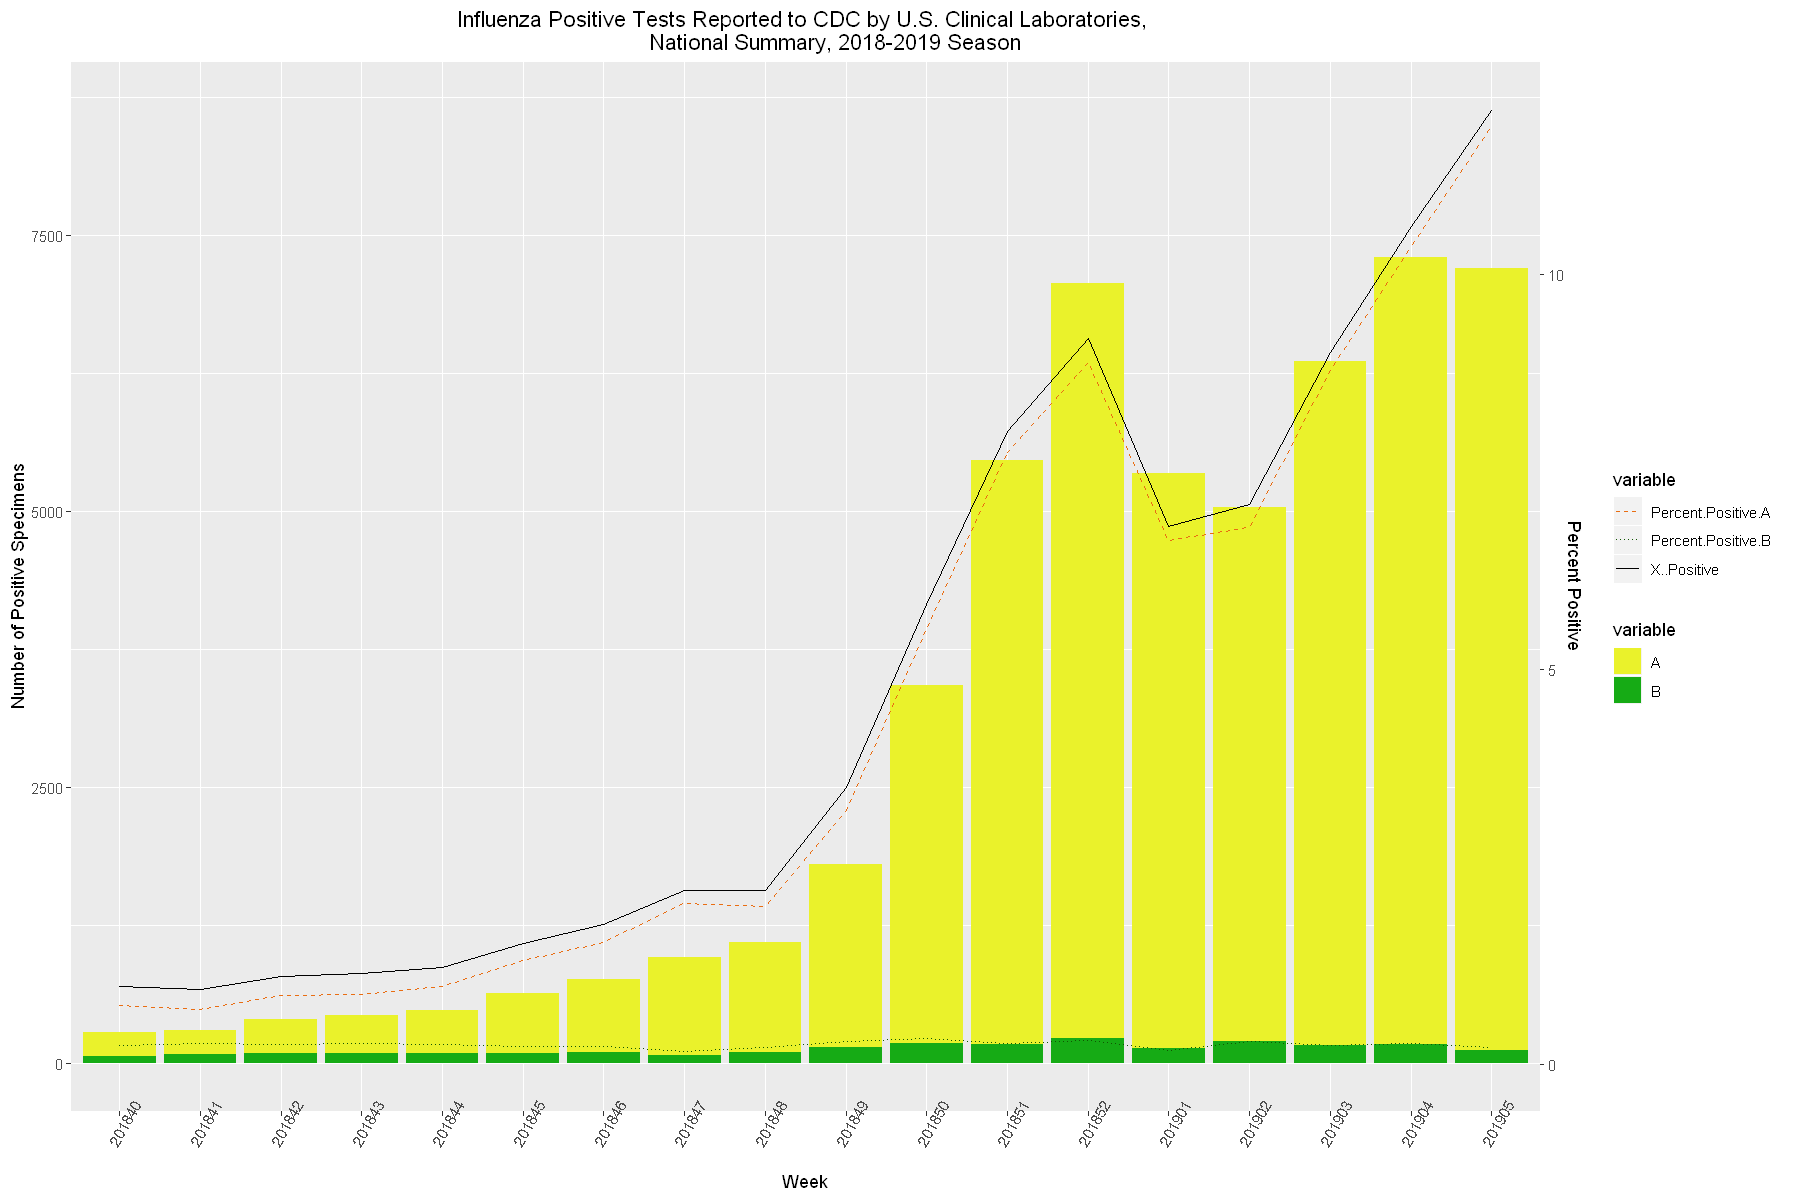

In [138]:
ggplot()+
  geom_bar(data=subset(melt_data,variable %in% c("Total.A","Total.B")),aes(x=factor(Week),y=value,fill=variable),stat="identity")+
  scale_fill_manual(values = c("#EAF22B", "#16AB15"),labels=c("A","B")) +
  
  geom_line(data=subset(melt_data, variable %in% c("Percent.Positive.A","Percent.Positive.B","X..Positive")),aes(x=factor(Week),y=value*400,group=variable,colour=variable,linetype=variable))+
  
  scale_colour_manual(values=c("#E96D12","#115502","#000000"))+scale_linetype_manual(values=c("dashed","dotted","solid")) +

  scale_y_continuous(sec.axis = sec_axis(~.*0.0014,"Percent Positive",breaks = round(seq(0,30, by =5),1)))+
  labs(x="Week",y="Number of Positive Specimens")+
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, 
          National Summary, 2018-2019 Season")+theme(axis.text.x = element_text(angle = 60))+
  theme(plot.title = element_text(hjust=0.5))

In [76]:
#Plot 2
data2 <- read.csv("C:/Users/TushaCr7/Desktop/Lab1-EDA/Plot2.csv",header =T)
head(data2)

Week,A.H3N2v.,A..H1N1.pdm09,A.H3.,A.unable.to.sub.type.,A.Subtyping.not.performed.,B,BVIC,BYAM,Total...Tested
201840,0,29,11,0,7,0,7,11,793
201841,0,52,11,0,7,5,3,5,898
201842,0,51,21,0,13,1,2,14,1086
201843,0,74,35,0,3,3,0,13,1089
201844,0,82,23,0,2,1,1,8,1217
201845,0,117,27,0,14,4,4,7,1306


In [77]:
data2 <- subset( data2, select = -c(5, 10 ))

melt_data2 <- melt(data2,id=c("Week"))

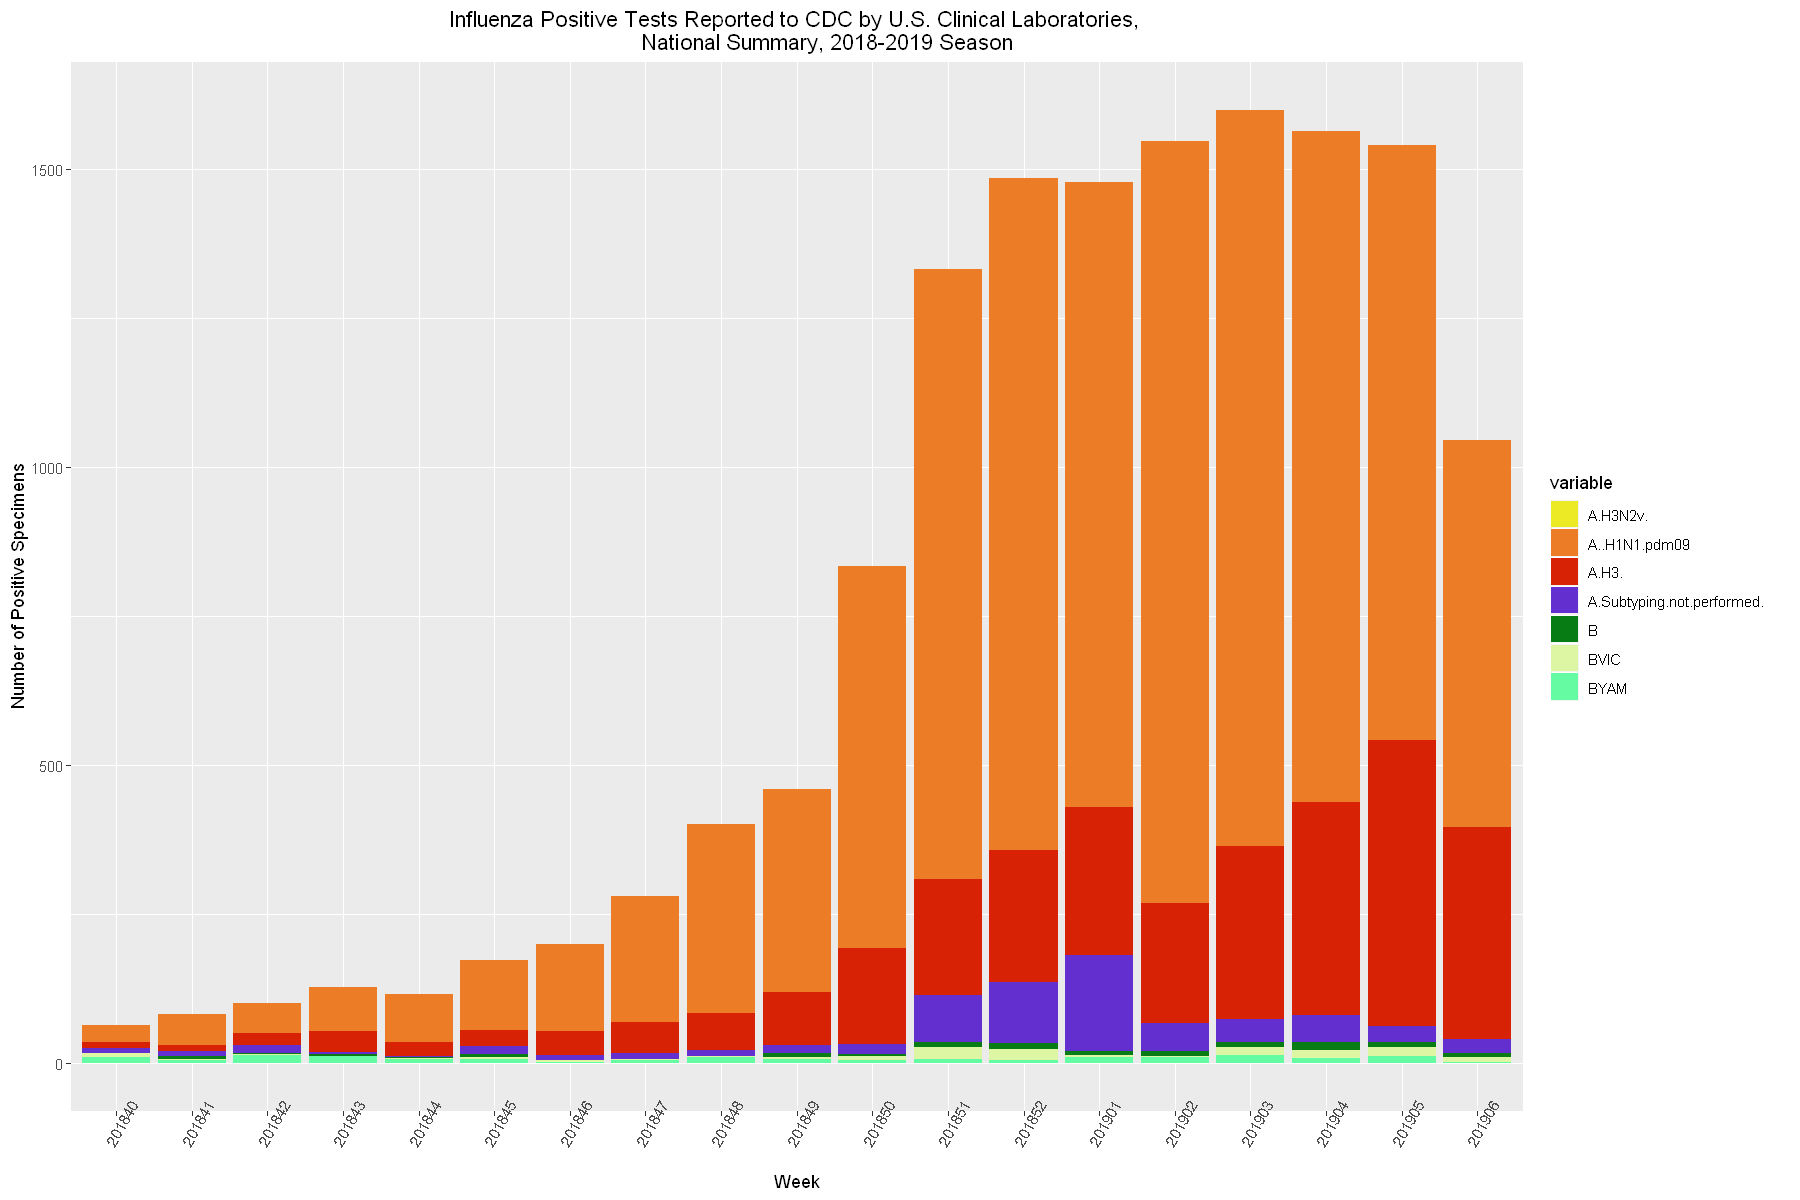

In [78]:
ggplot()+
  geom_bar(data=melt_data2,aes(x=factor(Week),y=value,fill=variable),stat="identity")+
  scale_fill_manual(values = c("#ECE925","#EC7C25","#D72206","#642FCF","#077C15","#DCF6A3","#65FBA3" ))+
  labs(x="Week",y="Number of Positive Specimens")+
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories, 
          National Summary, 2018-2019 Season")+theme(axis.text.x = element_text(angle = 60))+
  theme(plot.title = element_text(hjust=0.5))

In [79]:
#Plot 3
data3 <- read.csv("C:/Users/TushaCr7/Desktop/Lab1-EDA/Plot3.csv",header =T)[261:488,]
data3$yearweek <- paste(data3$Year, data3$Week)
data3$yearweekdate <- as.Date(paste(data3$yearweek, 1), "%Y %U %u")

Warning message:
"Removed 2 rows containing missing values (geom_path)."Warning message:
"Removed 2 rows containing missing values (geom_path)."Warning message:
"Removed 2 rows containing missing values (geom_path)."

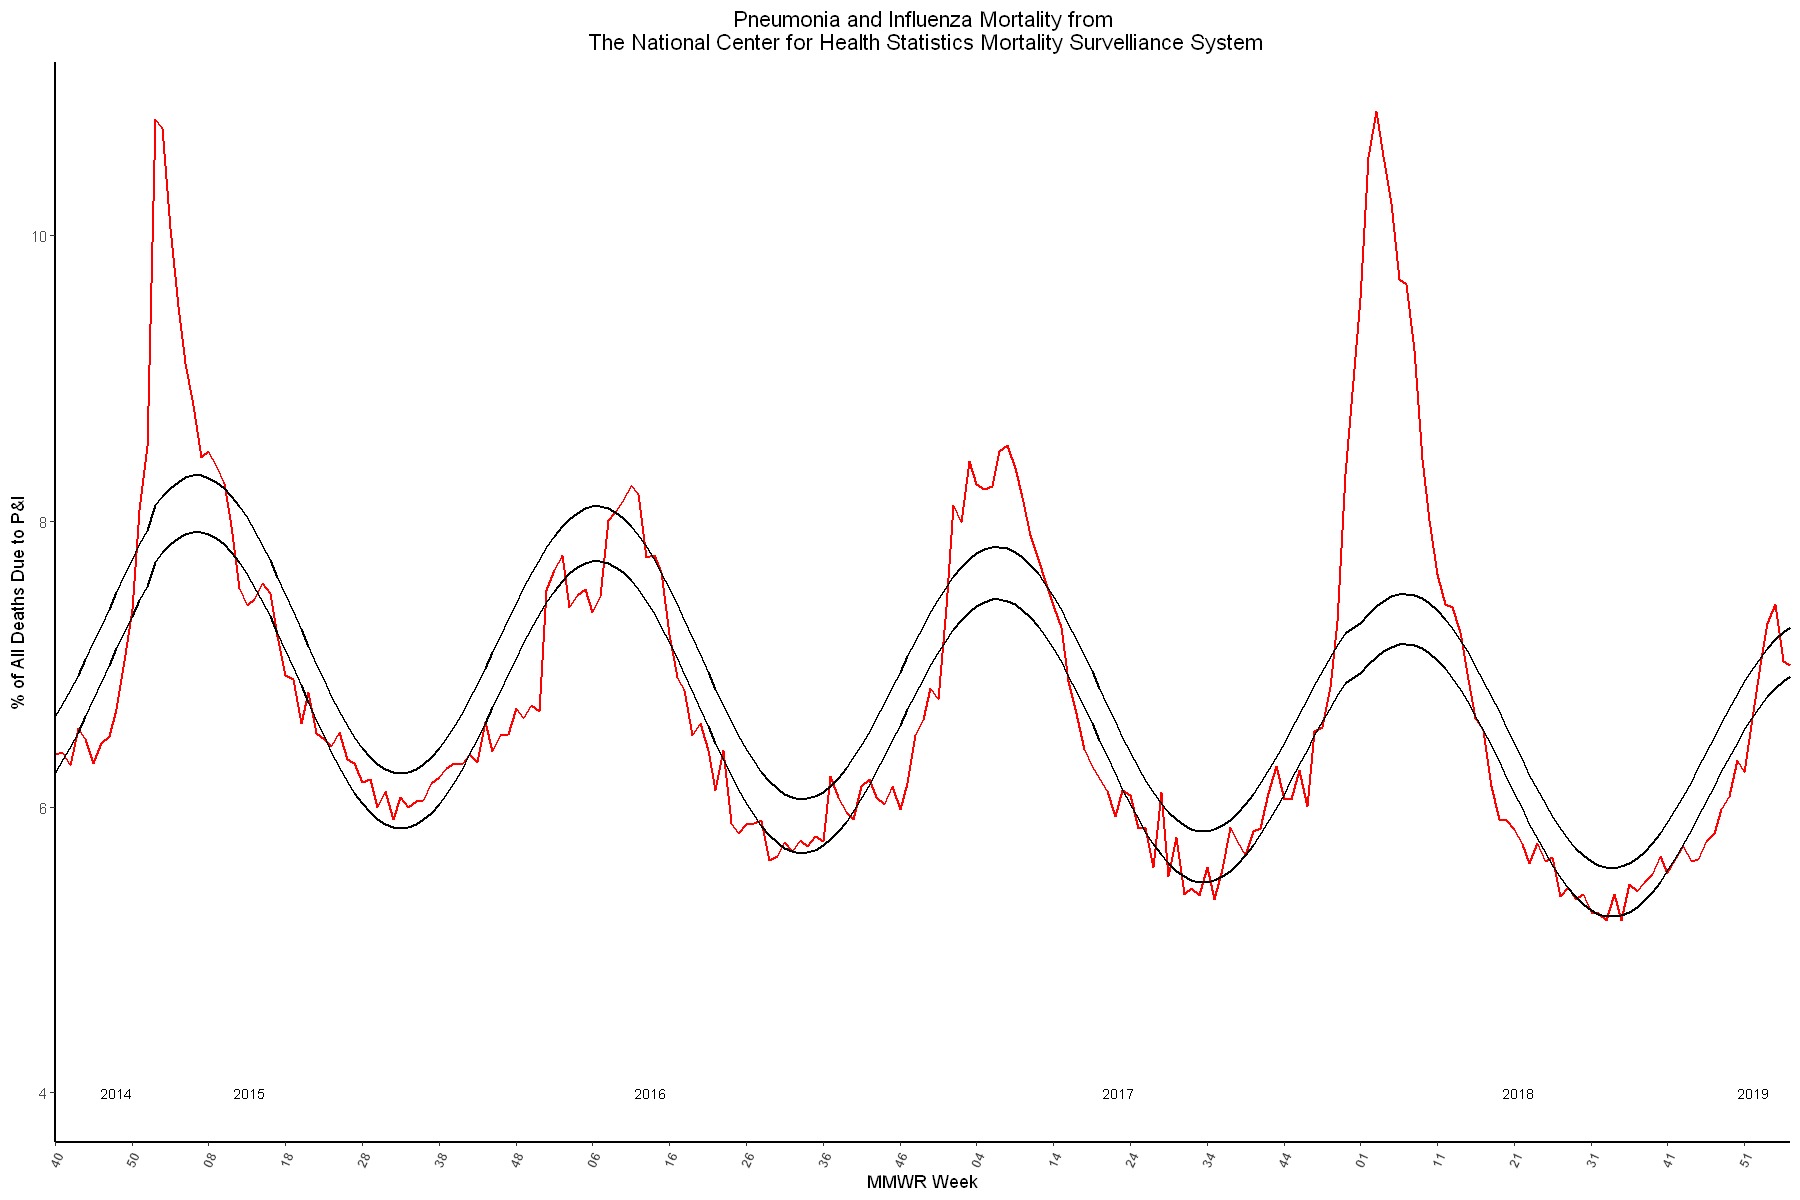

In [80]:
ggplot(data3) + 
    geom_line(aes(y = data3$Percent.of.Deaths.Due.to.Pneumonia.and.Influenza, x = yearweekdate), , color="red",stat = "identity", group = 1, size = .75) + 
    geom_line(aes(y = Threshold, x = yearweekdate), color="black",stat = "identity", group = 1, size = .75) + 
    geom_line(aes(y = Expected, x = yearweekdate), color="black",stat = "identity", group = 1, size = .75) +
    scale_x_date(date_breaks = "10 week", date_labels = "%U", expand=c(0,0)) +
    labs(x = "MMWR Week", y = "% of All Deaths Due to P&I") + 
    annotate("text",label="2014",x=as.Date("2014-12-01"), y=4, size=3) + annotate("text", label="2015", x=as.Date("2015-04-01"), y=4, size=3) +
    annotate("text",label="2016",x=as.Date("2016-04-01"), y=4, size=3) +  annotate("text", label="2017", x=as.Date("2017-06-01"), y=4, size=3) +
    annotate("text",label="2018",x=as.Date("2018-06-01"), y=4, size=3) + annotate("text", label="2019", x=as.Date("2019-01-01"), y=4, size=3) +
    ggtitle("Pneumonia and Influenza Mortality from\n The National Center for Health Statistics Mortality Survelliance System") + 
    theme(axis.text.x = element_text(face="bold", size = 8, angle=65, vjust = .5), plot.title = element_text(hjust = 0.5), panel.background = element_blank(), axis.line = element_line(color = "black", size = .8))


In [81]:
#Plot 4
data4 <- read.csv("C:/Users/TushaCr7/Desktop/Lab1-EDA/Plot4.csv",header =T)
head(data4)
melt_data4 <- melt(data4,id=c("WEEK.NUMBER","SEASON"))
head(melt_data4)

SEASON,WEEK.NUMBER,NO..OF.DEATHS,PREVIOUS.WEEK.DEATHS,CURRENT.WEEK.DEATHS
2015-16,2015-40,0,0,0
2015-16,2015-41,0,0,0
2015-16,2015-42,0,0,0
2015-16,2015-43,0,0,0
2015-16,2015-44,2,2,0
2015-16,2015-45,0,0,0


WEEK.NUMBER,SEASON,variable,value
2015-40,2015-16,NO..OF.DEATHS,0
2015-41,2015-16,NO..OF.DEATHS,0
2015-42,2015-16,NO..OF.DEATHS,0
2015-43,2015-16,NO..OF.DEATHS,0
2015-44,2015-16,NO..OF.DEATHS,2
2015-45,2015-16,NO..OF.DEATHS,0


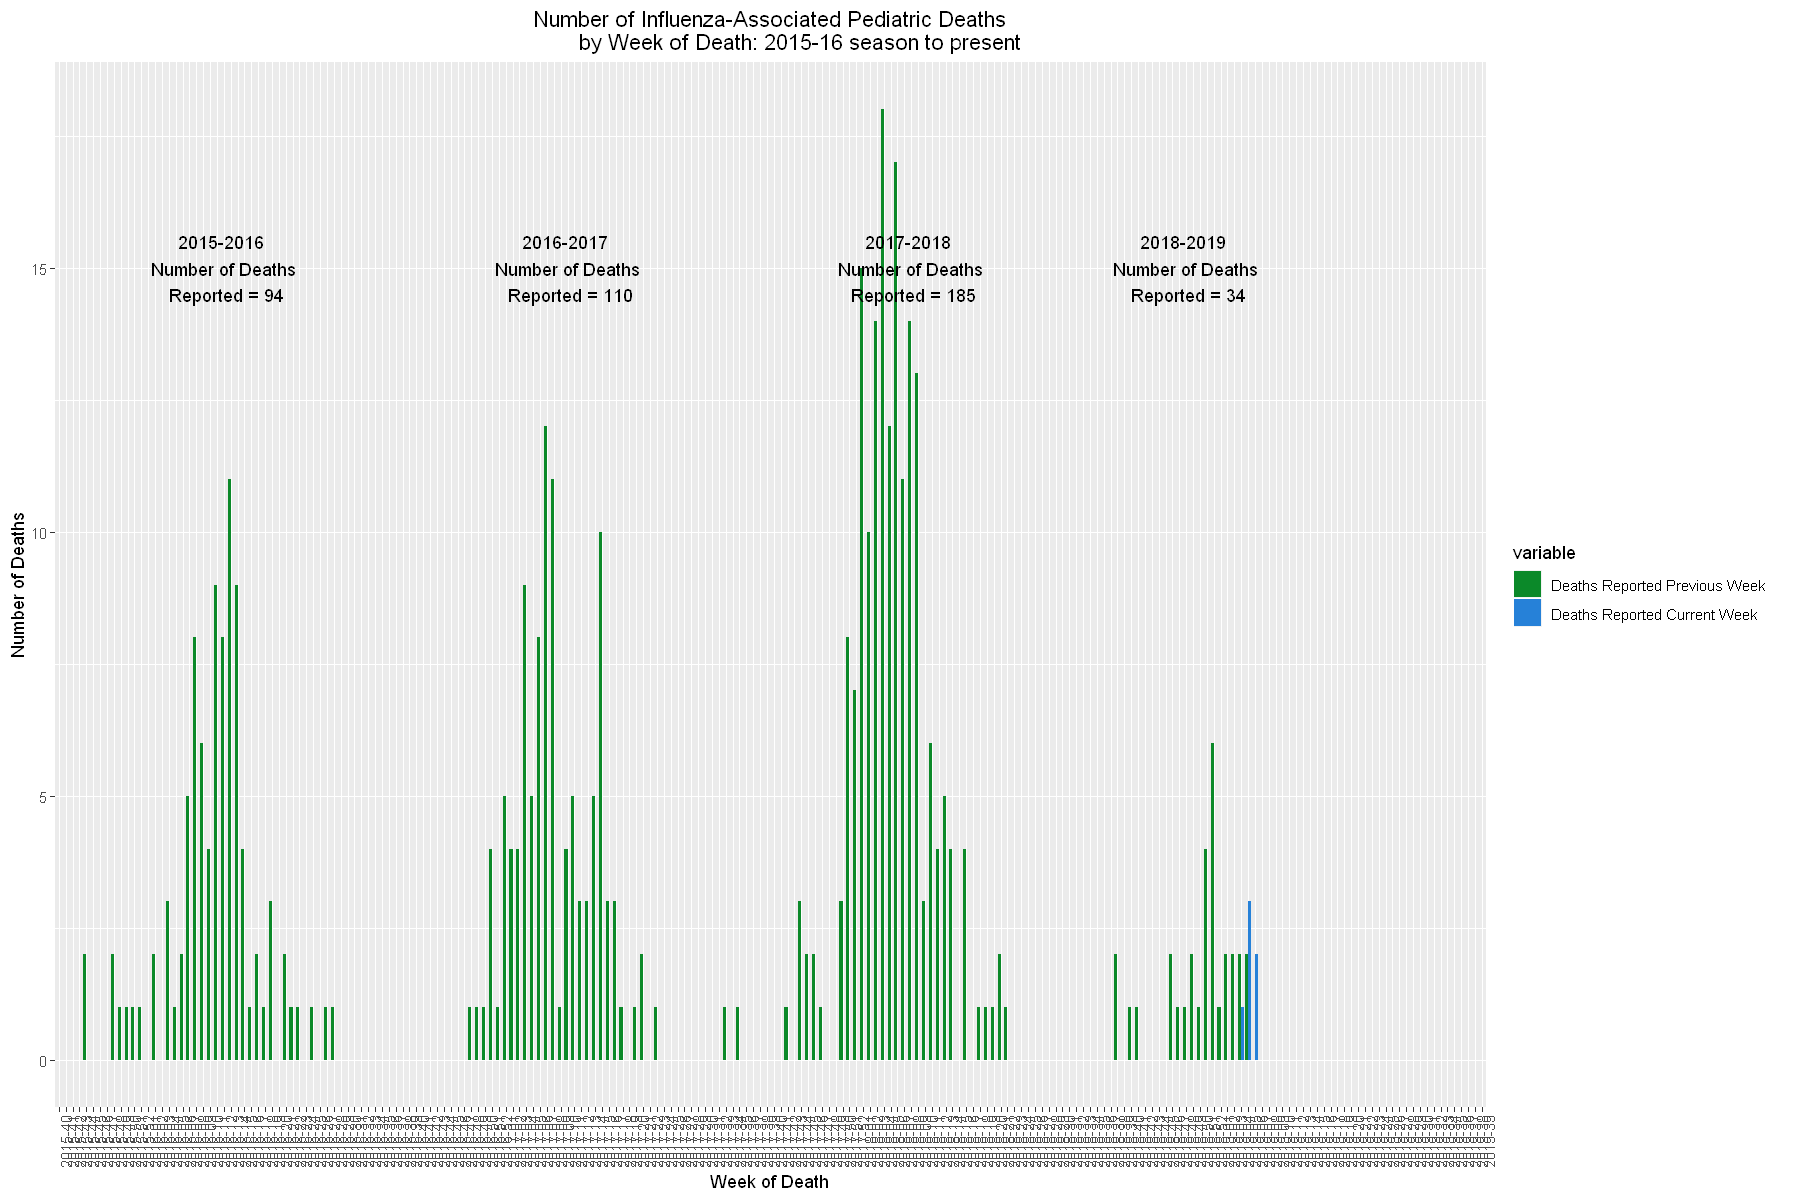

In [82]:

ggplot()+
  geom_bar(data=subset(melt_data4,variable %in% c("PREVIOUS.WEEK.DEATHS","CURRENT.WEEK.DEATHS")),aes(x=factor(WEEK.NUMBER),y=value,fill=variable),stat="identity",position = "dodge")+
  scale_fill_manual(values = c("#0B8929","#2681D8"),labels=c("Deaths Reported Previous Week","Deaths Reported Current Week"))+
  labs(x="Week of Death",y="Number of Deaths")+
  ggtitle("Number of Influenza-Associated Pediatric Deaths
          by Week of Death: 2015-16 season to present")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+annotate("text", x = 25, y = 15, label = "2015-2016 \n Number of Deaths \n Reported = 94")+
  annotate("text", x = 75, y = 15, label = "2016-2017 \n Number of Deaths \n Reported = 110")+annotate("text", x = 125, y = 15, label = "2017-2018 \n Number of Deaths \n Reported = 185")+
  annotate("text", x = 165, y = 15, label = "2018-2019 \n Number of Deaths \n Reported = 34")+
  theme(plot.title = element_text(hjust=0.5))
  

In [ ]:
#Plot 5

In [153]:
library("ggmap")
library("maptools")
library("maps")
library("ggplot2")

rm(list=ls())

df <- read.csv(file="C:/Users/TushaCr7/Desktop/Lab1-EDA/map.csv")


In [154]:
gpclibPermit()

[1] FALSE

In [155]:
df$ILI = sapply(df$ACTIVITY.LEVEL, 
                function(x) gsub("Level ", "", as.character(x)))
df$ILI = as.numeric(df$ILI)
head(df)

STATENAME,URL,WEBSITE,ACTIVITY.LEVEL,ACTIVITY.LEVEL.LABEL,WEEKEND,WEEK,SEASON,ILI
Alabama,http://adph.org/influenza/,Influenza Surveillance,Level 2,Minimal,Oct-06-2018,40,2018-19,2
Alaska,http://dhss.alaska.gov/dph/Epi/id/Pages/influenza/influenza.aspx%20,Influenza Surveillance Report,Level 1,Minimal,Oct-06-2018,40,2018-19,1
Arizona,http://www.azdhs.gov/phs/oids/epi/flu/index.htm,Influenza & RSV Surveillance,Level 1,Minimal,Oct-06-2018,40,2018-19,1
Arkansas,http://www.healthy.arkansas.gov/programs-services/topics/influenza,Communicable Disease and Immunizations,Level 1,Minimal,Oct-06-2018,40,2018-19,1
California,https://www.cdph.ca.gov/Programs/CID/DCDC/Pages/Immunization/Influenza.aspx,Influenza (Flu),Level 1,Minimal,Oct-06-2018,40,2018-19,1
Colorado,https://www.colorado.gov/pacific/cdphe/influenza,Influenza Surveillance,Level 1,Minimal,Oct-06-2018,40,2018-19,1


In [159]:
names = c()
stateILI = c()

for(i in unique(df$STATENAME)){
    names = append(names, i)
    stateILI = append(stateILI, max(df[which(df$STATENAME == i),]$ILI))
}

state_ILI = data.frame(names, stateILI)

In [160]:
head(state_ILI)

names,stateILI
Alabama,10
Alaska,10
Arizona,9
Arkansas,10
California,6
Colorado,10


In [161]:
fdata = map_data("state")

frequency = c()
#for level of ILI
for(i in 1:nrow(fdata)){
    frequency = append(frequency, state_ILI$stateILI[grep(fdata$region[i], tolower(state_ILI$names))[1]])
}
#frequency of ILI level
fdata$frequency = frequency
table(fdata$frequency)


   4    5    6    7    8    9   10 
1068 2321 1266  739  960 1625 7558 

In [171]:
dim(fdata)
head(fdata)

[1] 15537     8

long,lat,group,order,region,subregion,frequency,ILI_level
-87.46201,30.38968,1,1,alabama,NA,10,High
-87.48493,30.37249,1,2,alabama,NA,10,High
-87.52503,30.37249,1,3,alabama,NA,10,High
-87.53076,30.33239,1,4,alabama,NA,10,High
-87.57087,30.32665,1,5,alabama,NA,10,High
-87.58806,30.32665,1,6,alabama,NA,10,High


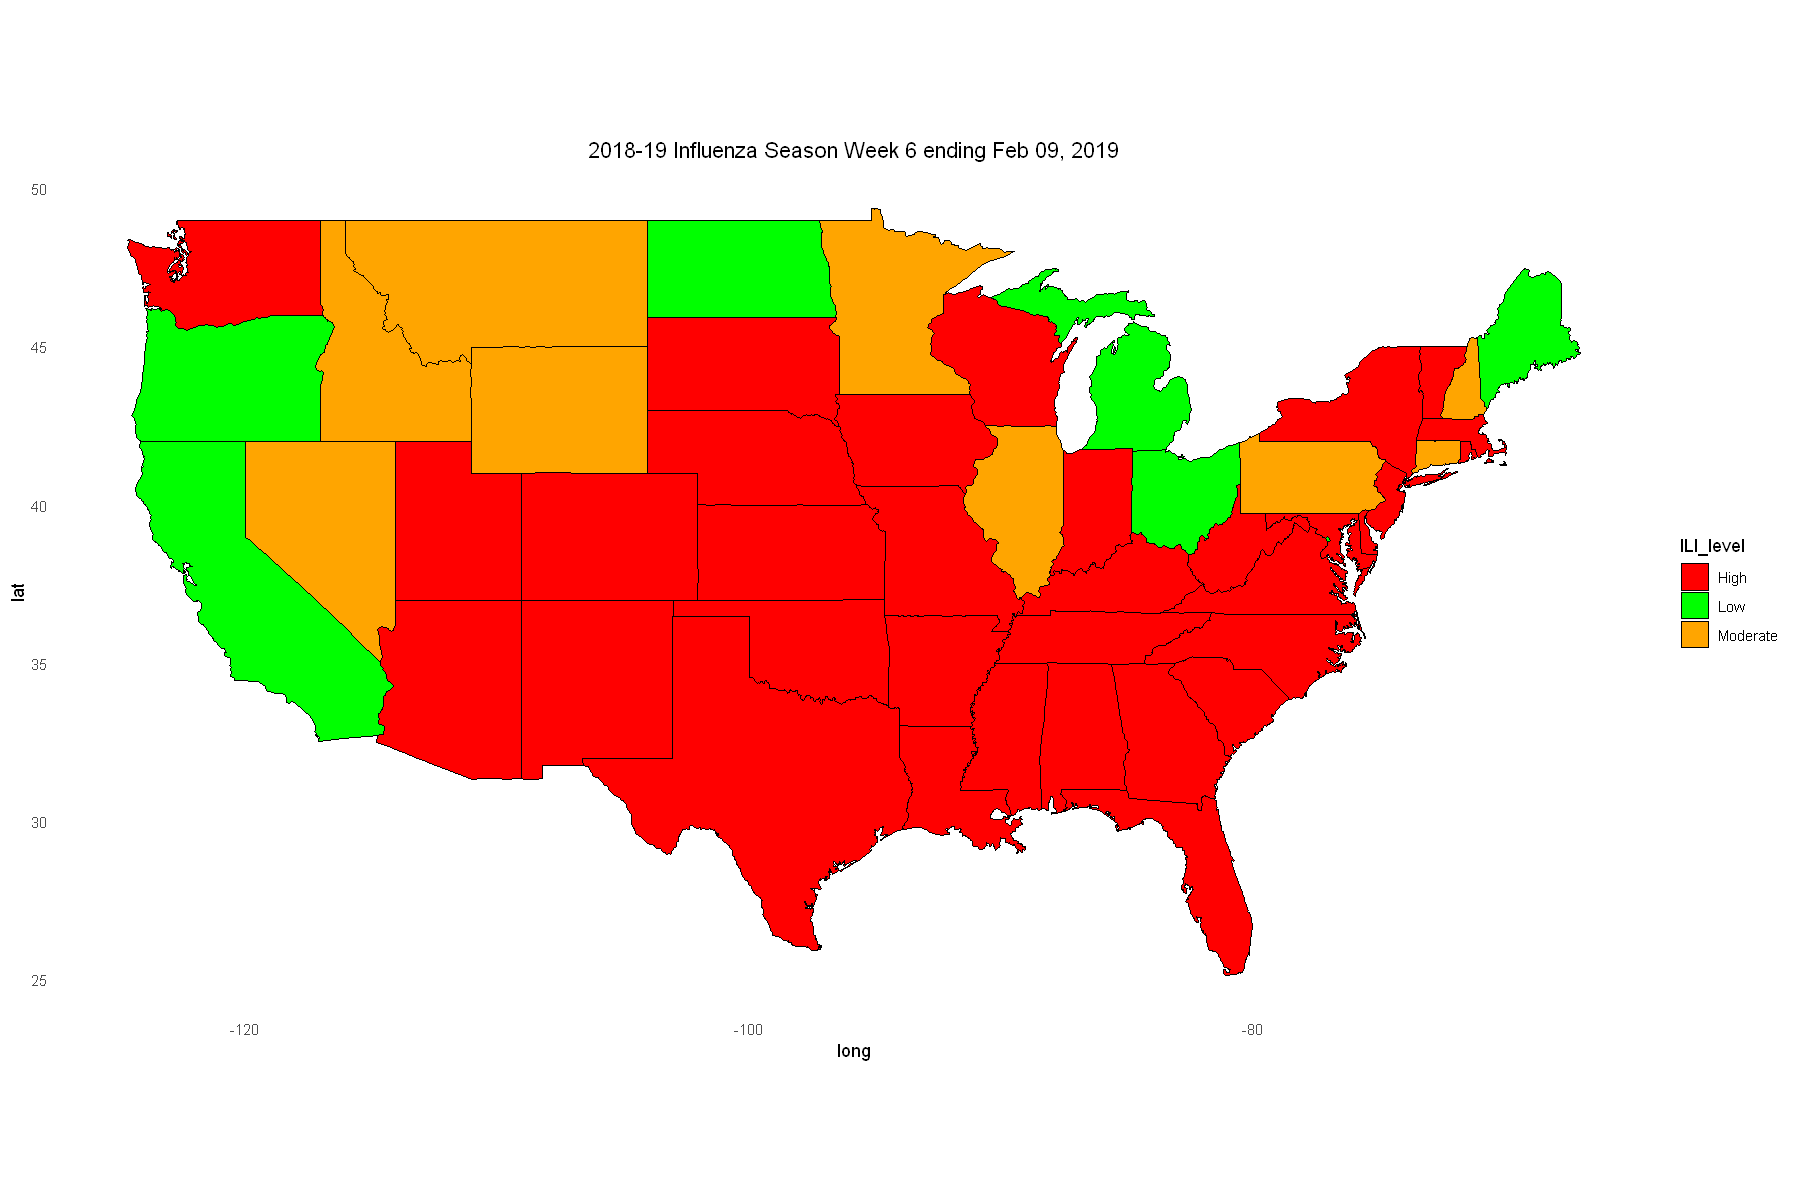

In [180]:
fdata$ILI_level = sapply(fdata$frequency, 
                                         function(x) ifelse(x %in% c(0,3), "Minimal", 
                                                            ifelse(x %in% c(4,6), "Low", 
                                                                   ifelse(x %in% c(7,8), "Moderate", "High"))))
options(repr.plot.width=15, repr.plot.height=10) 
ggplot(fdata, aes(long, lat)) +
  geom_polygon(aes(group = group, fill = ILI_level),color="black") + 
  ggtitle("2018-19 Influenza Season Week 6 ending Feb 09, 2019")+
  theme(plot.title = element_text(hjust=0.5))+ theme(panel.border = element_blank())+
                         theme(panel.background = element_blank())+theme(axis.ticks = element_blank())+
  scale_fill_manual(values = c("Red","Green","Orange","Yellow"))+coord_quickmap()
